# Predictive models to increase marketing profits

The marketing team aims to build a predictive model for the next direct marketing campaign.

- **Campaign Details**: the sixth campaign targets selling a new gadget to the Customer Database.
- **Pilot Campaign**: involved 2,240 randomly selected customers contacted by phone.
- **Results**: total cost of the sample campaign was 6,720MU; revenue from accepted offers was 3,674MU.
- **Overall Profit**: the campaign had a profit of -3,046MU.
- **Success Rate**: the campaign achieved a 15% success rate.
- **Model Goal**: develop a model to predict customer behavior for the entire customer base.
- **Additional Interest**: the CMO wants to study features of customers willing to buy the gadget.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, silhouette_score, ConfusionMatrixDisplay
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import prettytable
from tabulate import tabulate
import matplotlib.patches as mpatches

In [193]:
data = pd.read_csv('marketing_campaign.csv', sep=';')

**Hints**:

- Target variable: Response
- Cost per contact variable: Z_CostContact
- Revenue per positive response variable: Z_Revenue
- For each of the exam points, you find example codes in R, on e-learning

## Task 1
Analyze the data and provide **insights with key descriptive statistics**. *(10 points)*

In [194]:
data.shape

(2241, 29)

In [195]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


**Information about marketing campaign**
| Variable Name          | Description                                           | Type        |
| :---        |    :----:   |          ---: |
| AcceptedCmp1           | 1 if customer accepted the offer in the 1st campaign  | Binary      |
| AcceptedCmp2           | 1 if customer accepted the offer in the 2nd campaign  | Binary      |
| AcceptedCmp3           | 1 if customer accepted the offer in the 3rd campaign  | Binary      |
| AcceptedCmp4           | 1 if customer accepted the offer in the 4th campaign  | Binary      |
| AcceptedCmp5           | 1 if customer accepted the offer in the 5th campaign  | Binary      |
| Response               | 1 if customer accepted the offer in the last campaign | Binary      |
| Complain               | 1 if customer complained in the last 2 years          | Binary      |
| Z_CostContact          | Cost per contact variable                             | Non-binary  |
| Z_Revenue              | Revenue per positive response variable                | Non-binary  |
| ID                     | Customer's unique identifier                          | -           |

**Customer's personal information**
| Variable Name          | Description                                           | Type        |
| :---        |    :----:   |          ---: |
| Education              | Customer’s level of education                         | Categorical |
| Marital                | Customer’s marital status                             | Categorical |
| Kidhome                | Number of small children in customer’s household      | Non-binary  |
| Teenhome               | Number of teenagers in customer’s household           | Non-binary  |
| Income                 | Customer’s yearly household income                    | Non-binary  |
| Year_Birth             | Customer's year of birth                              | Non-binary  |

**Information about Customer behaviour**
| Variable Name          | Description                                           | Type        |
| :---        |    :----:   |          ---: |
| Dt_Customer             | Date of customer’s enrolment with the company         | Date         |
| MntFishProducts        | Amount spent on fish products in the last 2 years     | Non-binary  |
| MntMeatProducts        | Amount spent on meat products in the last 2 years     | Non-binary  |
| MntFruits              | Amount spent on fruits products in the last 2 years   | Non-binary  |
| MntSweetProducts       | Amount spent on sweet products in the last 2 years    | Non-binary  |
| MntWines               | Amount spent on wine products in the last 2 years     | Non-binary  |
| MntGoldProds           | Amount spent on gold products in the last 2 years     | Non-binary  |
| NumDealsPurchases      | Number of purchases made with discount                | Non-binary  |
| NumCatalogPurchases    | Number of purchases made using catalogue              | Non-binary  |
| NumStorePurchases      | Number of purchases made directly in stores           | Non-binary  |
| NumWebPurchases        | Number of purchases made through company’s web site   | Non-binary  |
| NumWebVisitsMonth      | Number of visits to company’s web site in the last month | Non-binary  |
| Recency                | Number of days since the last purchase                | Non-binary  |



In [196]:
# remove nan rows
data = data.dropna()
# check for duplicate rows
data.duplicated().sum()
# print the type of each column to check if there are any non-numeric columns (eventually change data type)
print(data.dtypes)

ID                     float64
Year_Birth             float64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Z_CostContact          float64
Z_Revenue              float64
Response                object
dtype: object


**Need to change**: Year_Birth, Kidhome, Teenhome, Dt_Customer, Recency, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp{1-5}, Complain

In [197]:
# put all variables in the right format (if they are not already okay)
data['Year_Birth'] = data['Year_Birth'].astype(int) # needed to compute the age
data['Kidhome'] = data['Kidhome'].astype(int)
data['Teenhome'] = data['Teenhome'].astype(int)
data['Recency'] = data['Recency'].astype(int)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d').dt.date
data['NumDealsPurchases'] = data['NumDealsPurchases'].astype(int)
data['NumWebPurchases'] = data['NumWebPurchases'].astype(int)
data['NumCatalogPurchases'] = data['NumCatalogPurchases'].astype(int)
data['NumStorePurchases'] = data['NumStorePurchases'].astype(int)
data['NumWebVisitsMonth'] = data['NumWebVisitsMonth'].astype(int)
data['AcceptedCmp1'] = data['AcceptedCmp1'].astype(int)
data['AcceptedCmp2'] = data['AcceptedCmp2'].astype(int)
data['AcceptedCmp3'] = data['AcceptedCmp3'].astype(int)
data['AcceptedCmp4'] = data['AcceptedCmp4'].astype(int)
data['AcceptedCmp5'] = data['AcceptedCmp5'].astype(int)
data['Complain'] = data['Complain'].astype(int)
data['Response'] = pd.to_numeric(data['Response'], errors='coerce')

In [198]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,7,0,0,0,0,0,0,3.0,11.0,1
1,2174.0,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,5,0,0,0,0,0,0,3.0,11.0,0
2,4141.0,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,4,0,0,0,0,0,0,3.0,11.0,0
3,6182.0,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,6,0,0,0,0,0,0,3.0,11.0,0
4,5324.0,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,5,0,0,0,0,0,0,3.0,11.0,0


In [199]:
# create varible "age" and anoher variable for how much time the person is a client
data['age'] = 2024 - data['Year_Birth']
data['client_time_years'] = round((pd.to_datetime('2024-01-01') - pd.to_datetime(data['Dt_Customer'])).dt.days / 365, 1)
# combine the number of kids and teens at home into one variable
data['Children'] = data['Kidhome'] + data['Teenhome']
# remove the columns that are not needed anymore
data = data.drop(['Year_Birth', 'Dt_Customer', 'ID'], axis=1) # 'Kidhome', 'Teenhome'

### Customer's personal information
Education, Marital Status, Children, Income, Year_Birth 

In [200]:
# check the unique values of the categorical variables
print(f'Education: {data["Education"].value_counts()} \n\n')
# if marital status is Absurd, Alone, or YOLO, change it to 'Other'
data['Marital_Status'] = data['Marital_Status'].replace(['Absurd', 'Alone', 'YOLO'], 'Other')
print(f'Marital Status: \{data["Marital_Status"].value_counts()}')

Education: Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 


Marital Status: \Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Other         7
Name: count, dtype: int64


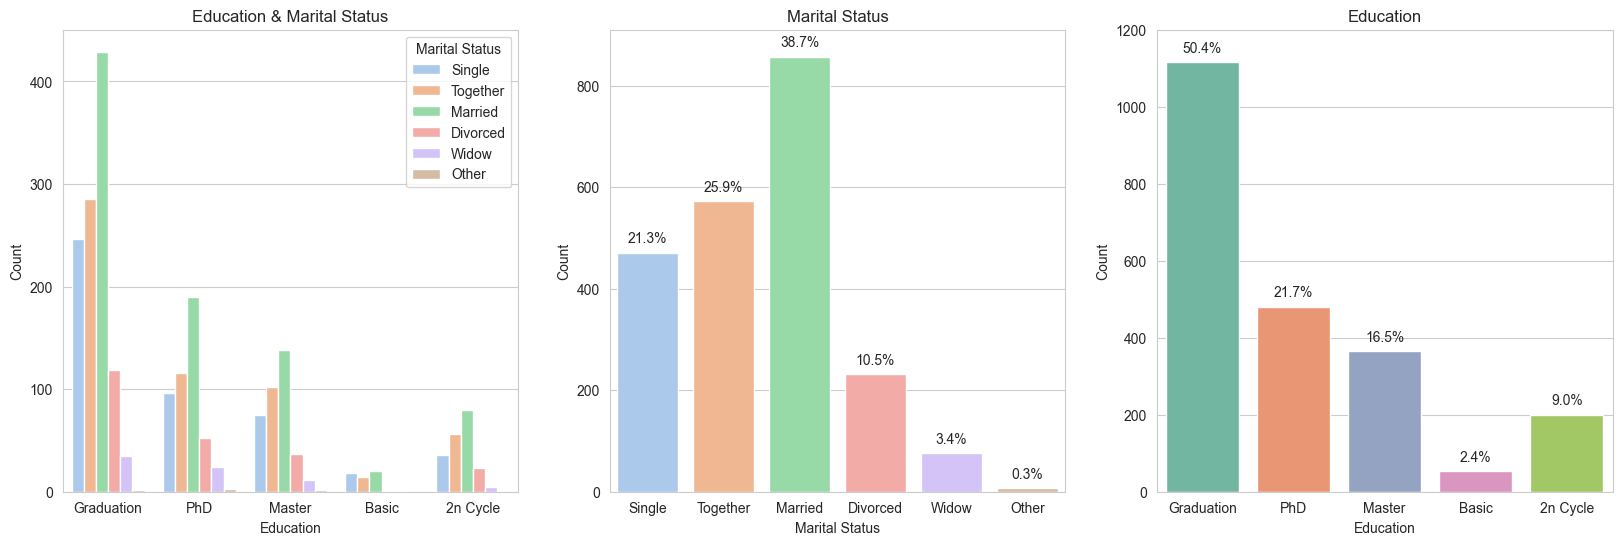

In [201]:
#bar plot of the categorical variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_style('whitegrid')
sns.countplot(x='Education', data=data, ax=axes[0], hue='Marital_Status', palette='pastel')
sns.set_style('whitegrid')
axes[0].legend(title='Marital Status')
axes[0].set_title('Education & Marital Status')
axes[0].set_ylabel('Count')
sns.countplot(x='Marital_Status', data=data, ax=axes[1], hue='Marital_Status', legend=False, palette='pastel')
# add percentages on top of the bars
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# change hight of the plot
axes[1].set_ylim(0, 910)
axes[1].set_title('Marital Status')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Marital Status')
sns.countplot(x='Education', data=data, ax=axes[2], hue='Education', palette='Set2')
# add values on top of the bars
for p in axes[2].patches:
    axes[2].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[2].set_title('Education')
axes[2].set_ylabel('Count')
axes[2].set_ylim(0, 1200)
plt.show()

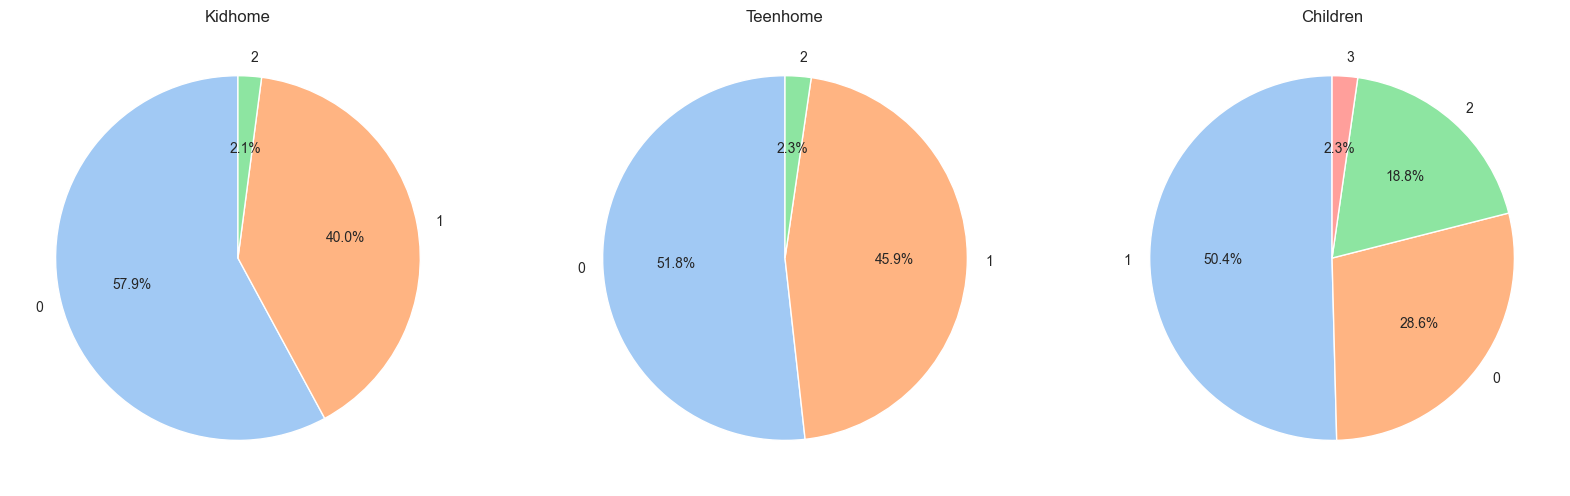

In [202]:
# pie chart of Kidhome, Teenhome and Children
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_palette('pastel')
data['Kidhome'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], startangle=90)
axes[0].set_title('Kidhome')
axes[0].set_ylabel('')
data['Teenhome'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], startangle=90)
axes[1].set_title('Teenhome')
axes[1].set_ylabel('')
data['Children'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2], startangle=90)
axes[2].set_title('Children')
axes[2].set_ylabel('')
plt.show()

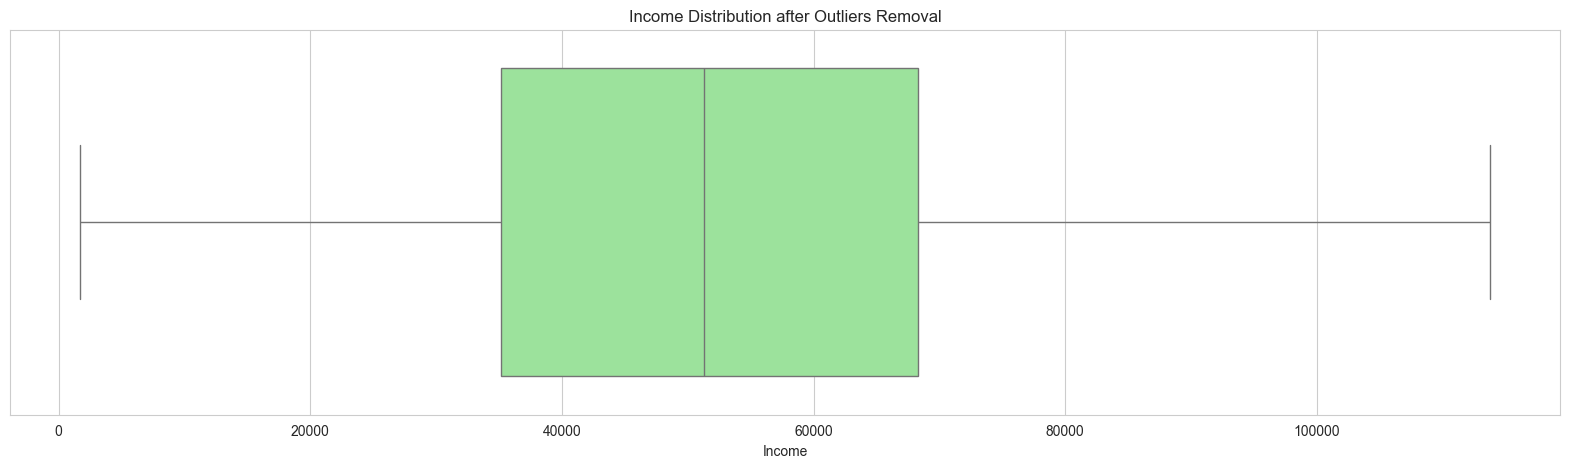

In [203]:
# remove all outlier for the income variable
data = data[data['Income'] < 150000]
# boxplot of the income variable
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x='Income', data=data, color='lightgreen')
plt.title('Income Distribution after Outliers Removal')
plt.show()

In [204]:
data.shape # only 30 ca. rows were removed

(2208, 29)

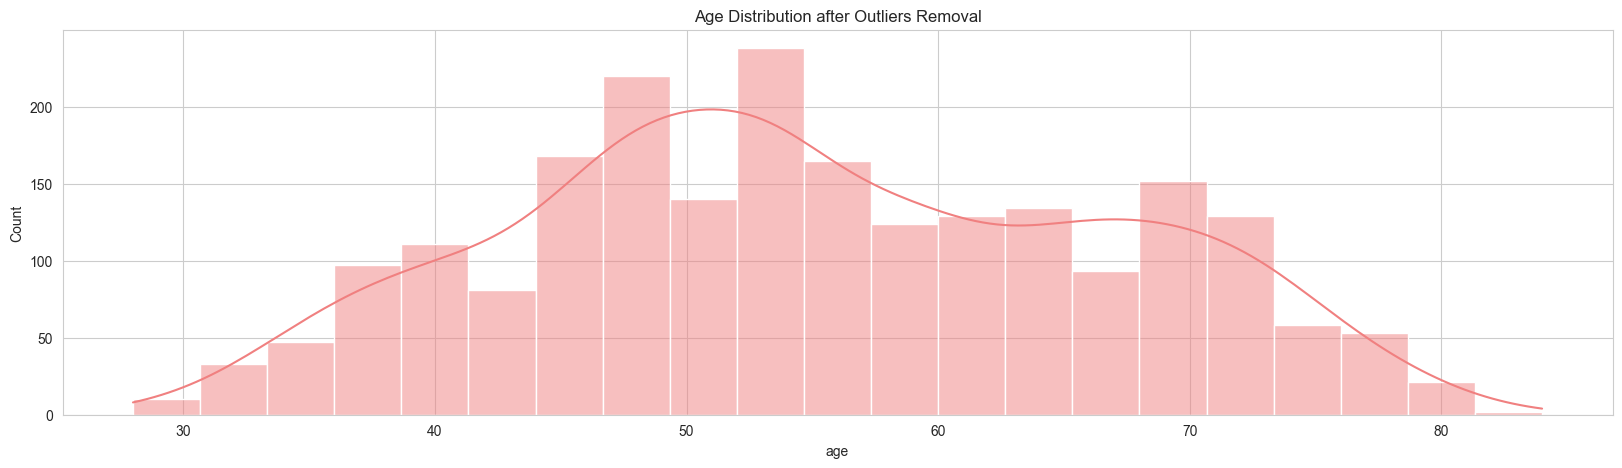

In [205]:
# age distribution
# check for age outliers
data['age'].describe()
data = data[data['age'] < 100]
fig, ax = plt.subplots(figsize=(20, 5))
sns.histplot(data['age'], kde=True, color='lightcoral', ax=ax)
plt.title('Age Distribution after Outliers Removal')
plt.show()

In [206]:
data.shape # only three rows were removed

(2205, 29)

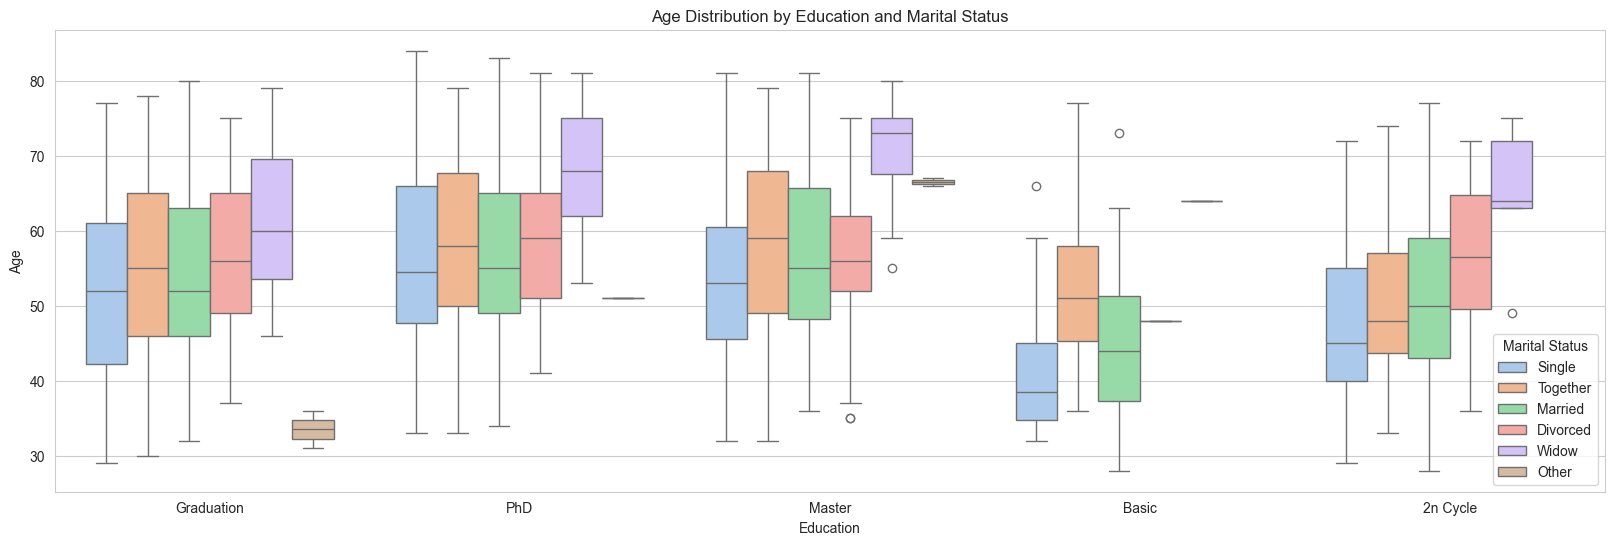

In [207]:
# Age Distribution by Education and Marital Status
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_palette('pastel')
sns.boxplot(x='Education', y='age', data=data, hue='Marital_Status', ax=ax)
plt.ylabel('Age')
plt.legend(title='Marital Status')
plt.title('Age Distribution by Education and Marital Status')
plt.show()

### Information about Customer behaviour
Dt_Customer, MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds, NumDealsPurchases, NumWebPurchased, NumCatalogPurchases, NumStorePurchases, NumWebPurchases, NumWebVisitsMonth, Recency

**Time**: Recency and client_time_years

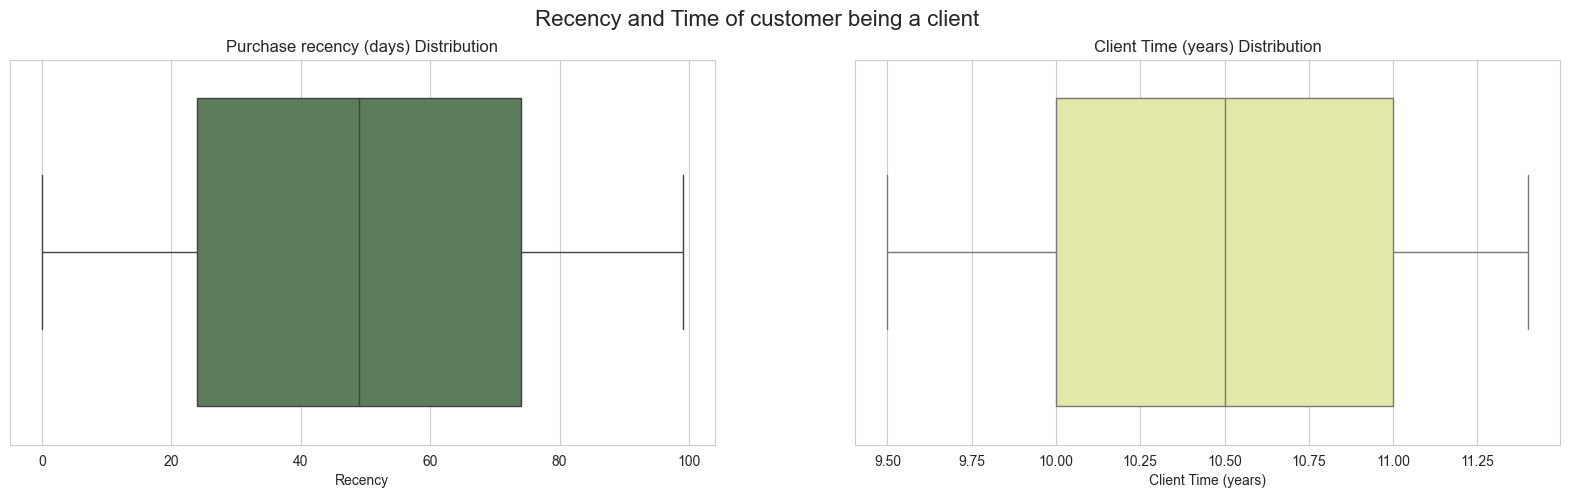

In [208]:
# recency and client_time_years boxplot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Recency and Time of customer being a client \n', fontsize=16)
sns.boxplot(x='Recency', data=data, color='#588157', ax=ax[0])
ax[0].set_title('Purchase recency (days) Distribution')
sns.boxplot(x='client_time_years', data=data, color='#ecf39e', ax=ax[1])
ax[1].set_title('Client Time (years) Distribution')
ax[1].set_xlabel('Client Time (years)')
plt.show()

**Amount of goods Purchased**:  MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds

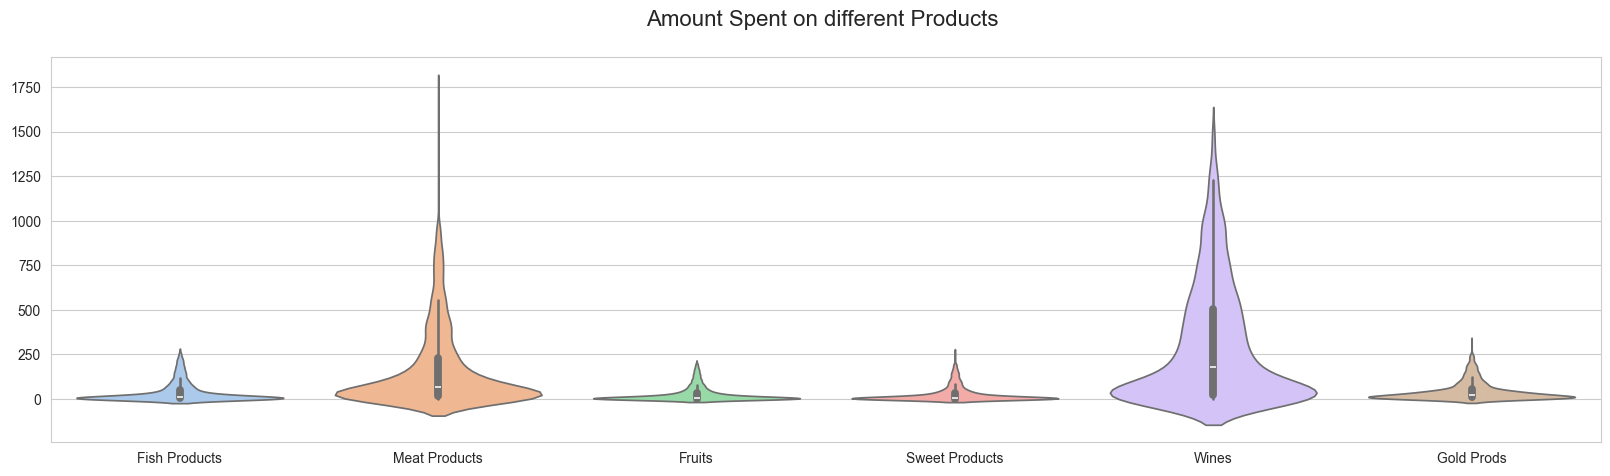

In [209]:
# violin plot of the varibles MntFishProducts, MntMeatProducts, MntFruits, MntSweetProducts, MntWines, MntGoldProds in the same plot
fig, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(data=data[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']], ax=ax)
# label the x-axis
plt.xticks([0, 1, 2, 3, 4, 5], ['Fish Products', 'Meat Products', 'Fruits', 'Sweet Products', 'Wines', 'Gold Prods'])
plt.title('Amount Spent on different Products \n', fontdict={'fontsize': 16})
plt.show()

**Purchases**: NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases and NumWebVisitsMonth

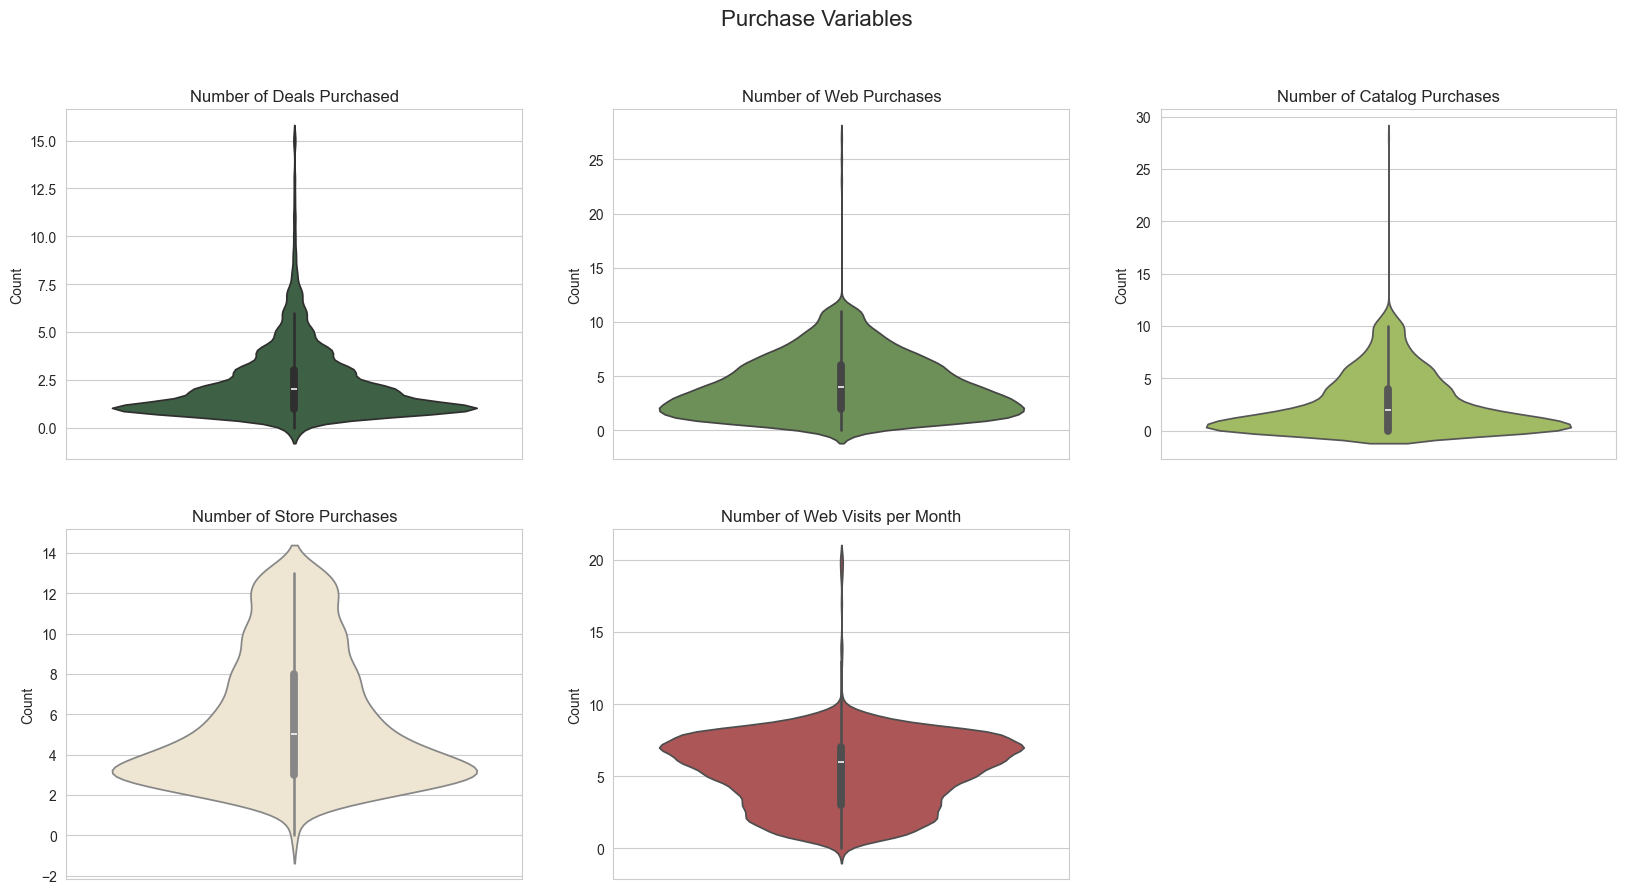

In [210]:
# violin plot of the varibles Number of Deals, Web, Catalog, Store Purchases and Web Visits per Month in different plots
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Purchase Variables', fontsize=16)
sns.violinplot(y='NumDealsPurchases', data=data, color='#386641', ax=ax[0, 0])
ax[0, 0].set_title('Number of Deals Purchased')
ax[0, 0].set_ylabel('Count')
sns.violinplot(y='NumWebPurchases', data=data, color='#6A994E', ax=ax[0, 1])
ax[0, 1].set_title('Number of Web Purchases')
ax[0, 1].set_ylabel('Count')
sns.violinplot(y='NumCatalogPurchases', data=data, color='#A7C957', ax=ax[0, 2])
ax[0, 2].set_title('Number of Catalog Purchases')
ax[0, 2].set_ylabel('Count')
sns.violinplot(y='NumStorePurchases', data=data, color='#F2E8CF', ax=ax[1, 0])
ax[1, 0].set_title('Number of Store Purchases')
ax[1, 0].set_ylabel('Count')
sns.violinplot(y='NumWebVisitsMonth', data=data, color='#BC4749', ax=ax[1, 1])
ax[1, 1].set_title('Number of Web Visits per Month')
ax[1, 1].set_ylabel('Count')
fig.delaxes(ax[1, 2])
plt.show()

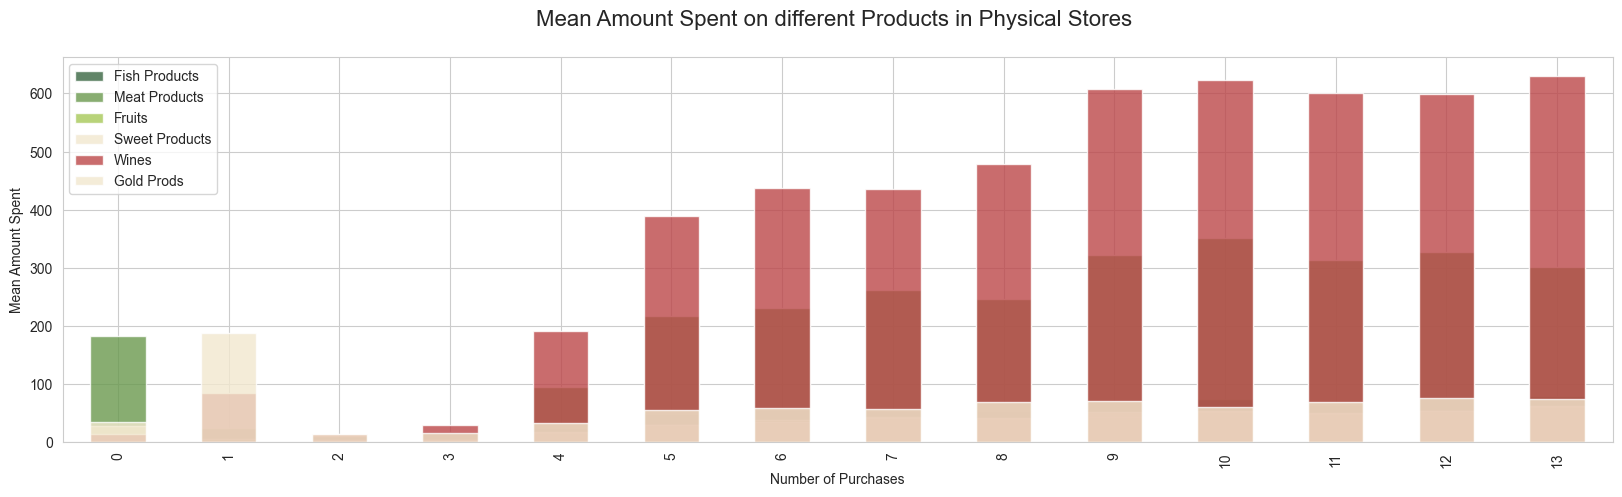

In [211]:
# bar plot of the mean amount spent on different products in physical stores
fig, ax = plt.subplots(figsize=(20, 5))
data.groupby('NumStorePurchases')['MntFishProducts'].mean().plot(kind='bar', color='#386641', ax=ax, alpha=0.8, label='Fish Products')
data.groupby('NumStorePurchases')['MntMeatProducts'].mean().plot(kind='bar', color='#6A994E', ax=ax, alpha=0.8, label='Meat Products')
data.groupby('NumStorePurchases')['MntFruits'].mean().plot(kind='bar', color='#A7C957', ax=ax, alpha=0.8, label='Fruits')
data.groupby('NumStorePurchases')['MntSweetProducts'].mean().plot(kind='bar', color='#F2E8CF', ax=ax, alpha=0.8, label='Sweet Products')
data.groupby('NumStorePurchases')['MntWines'].mean().plot(kind='bar', color='#BC4749', ax=ax, alpha=0.8, label='Wines')
data.groupby('NumStorePurchases')['MntGoldProds'].mean().plot(kind='bar', color='#F2E8CF', ax=ax, alpha=0.8, label='Gold Prods')
plt.title('Mean Amount Spent on different Products in Physical Stores \n', fontdict={'fontsize': 16})
plt.ylabel('Mean Amount Spent')
plt.xlabel('Number of Purchases')
plt.legend()
plt.show()


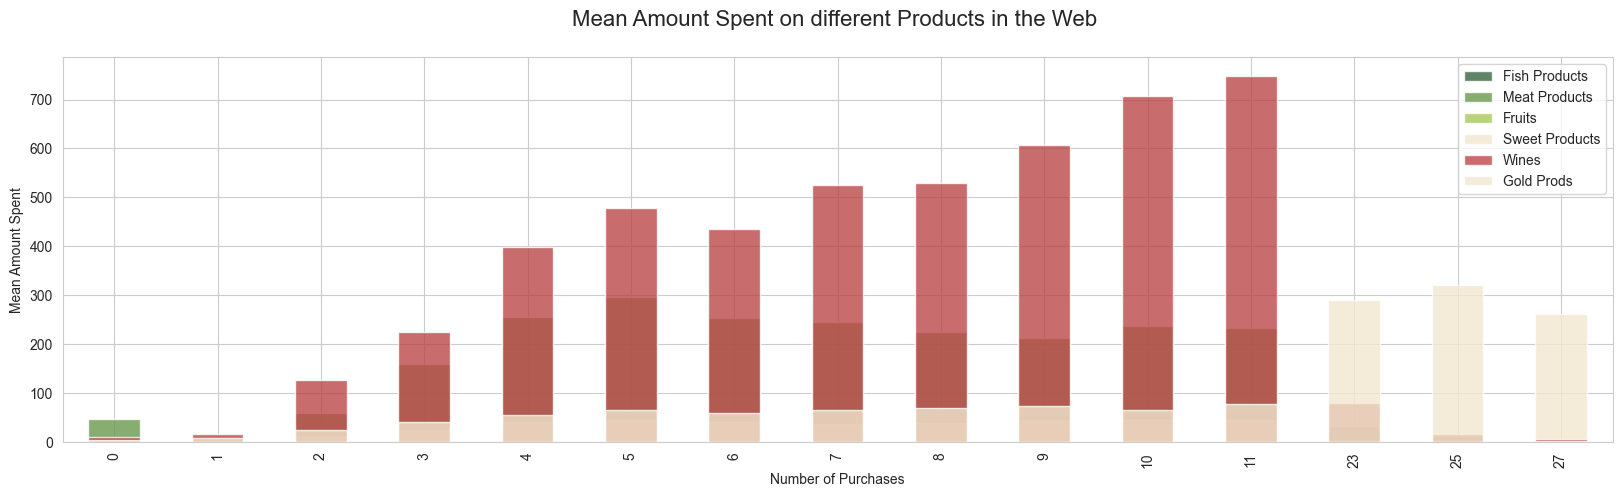

In [212]:
# bar plot of the mean amount spent on different products in the web
fig, ax = plt.subplots(figsize=(20, 5))
data.groupby('NumWebPurchases')['MntFishProducts'].mean().plot(kind='bar', color='#386641', ax=ax, alpha=0.8, label='Fish Products')
data.groupby('NumWebPurchases')['MntMeatProducts'].mean().plot(kind='bar', color='#6A994E', ax=ax, alpha=0.8, label='Meat Products')
data.groupby('NumWebPurchases')['MntFruits'].mean().plot(kind='bar', color='#A7C957', ax=ax, alpha=0.8, label='Fruits')
data.groupby('NumWebPurchases')['MntSweetProducts'].mean().plot(kind='bar', color='#F2E8CF', ax=ax, alpha=0.8, label='Sweet Products')
data.groupby('NumWebPurchases')['MntWines'].mean().plot(kind='bar', color='#BC4749', ax=ax, alpha=0.8, label='Wines')
data.groupby('NumWebPurchases')['MntGoldProds'].mean().plot(kind='bar', color='#F2E8CF', ax=ax, alpha=0.8, label='Gold Prods')
plt.title('Mean Amount Spent on different Products in the Web \n', fontdict={'fontsize': 16})
plt.ylabel('Mean Amount Spent')
plt.xlabel('Number of Purchases')
plt.legend()
plt.show()

### Information about marketing 
AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, Complain, Z_CostContact, Z_Revenue

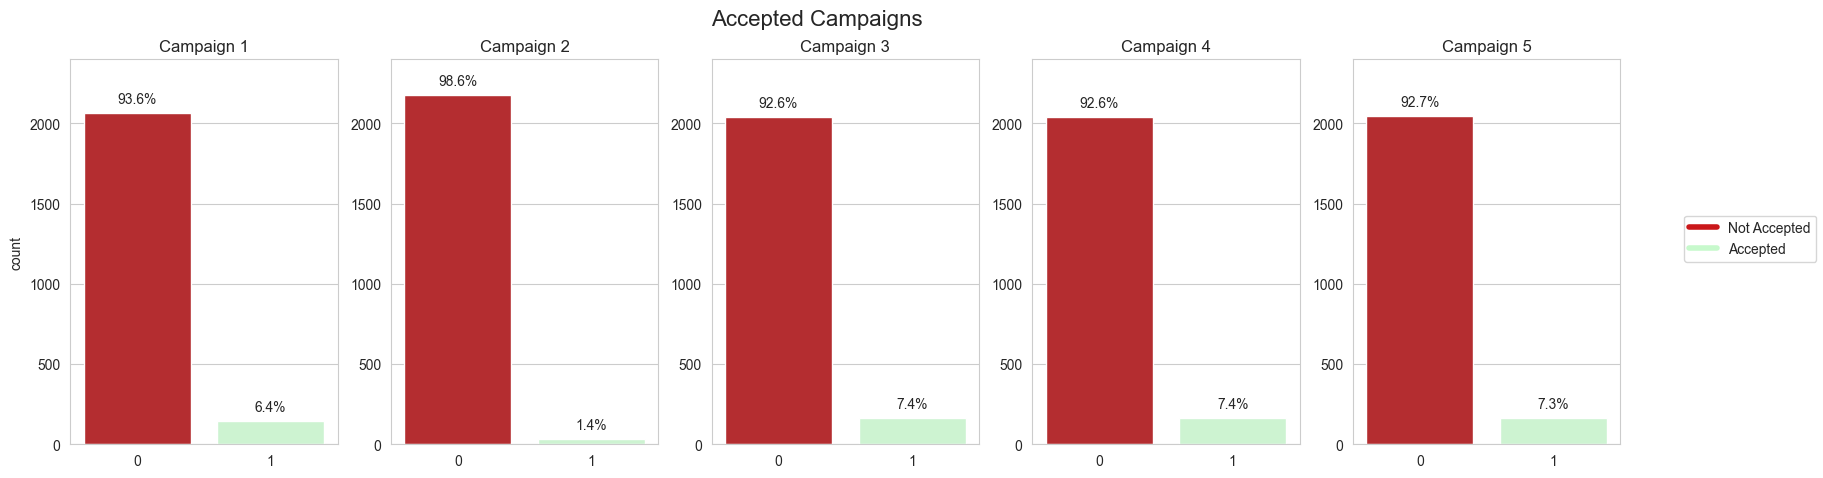

In [213]:
# plot all the groped bar chart for the accepted campaigns visualizing the number of people that accepted the campaign
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
colors = ['#ca171a', '#c7f9cc']
fig.suptitle('Accepted Campaigns \n', fontsize=16)
fig.legend(labels=['Not Accepted', 'Accepted'], loc='center right', handles=[plt.Line2D([0], [0], color=colors[0], lw=4), plt.Line2D([0], [0], color=colors[1], lw=4)])
sns.countplot(x='AcceptedCmp1', data=data, ax=ax[0], hue='AcceptedCmp1', palette=colors, legend=False)
#ax[0].legend(title='Campaign 1', labels=['Not Accepted', 'Accepted'])
# add percentages on top of the bars
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax[0].set_title('Campaign 1')
ax[0].set_ylim(0, 2400)
ax[0].set_xlabel('')
sns.countplot(x='AcceptedCmp2', data=data, ax=ax[1], hue='AcceptedCmp2', palette=colors, legend=False)
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax[1].set_title('Campaign 2')
ax[1].set_ylim(0, 2400)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
sns.countplot(x='AcceptedCmp3', data=data, ax=ax[2], hue='AcceptedCmp3', palette=colors, legend=False)
for p in ax[2].patches:
    ax[2].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax[2].set_title('Campaign 3')
ax[2].set_ylim(0, 2400)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
sns.countplot(x='AcceptedCmp4', data=data, ax=ax[3], hue='AcceptedCmp4', palette=colors, legend=False)
for p in ax[3].patches:
    ax[3].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax[3].set_title('Campaign 4')
ax[3].set_ylim(0, 2400)
ax[3].set_ylabel('')
ax[3].set_xlabel('')
sns.countplot(x='AcceptedCmp5', data=data, ax=ax[4], hue='AcceptedCmp5', palette=colors, legend=False)
for p in ax[4].patches:
    ax[4].annotate(f"{p.get_height()/data.shape[0]*100:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax[4].set_title('Campaign 5')
ax[4].set_ylim(0, 2400)
ax[4].set_ylabel('')
ax[4].set_xlabel('')
plt.show()

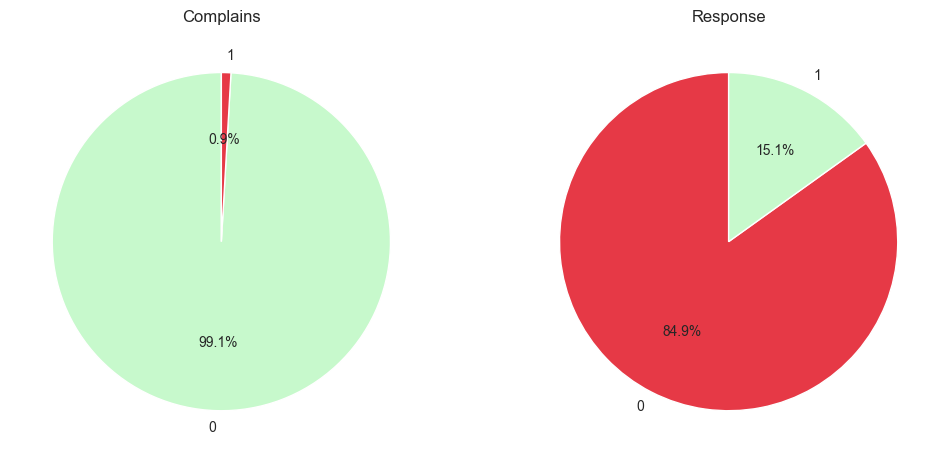

In [214]:
# pie chart for the variables complain and response
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
data['Complain'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0], colors=['#c7f9cc', '#e63946'])
ax[0].set_title('Complains')
ax[0].set_ylabel('')
data['Response'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1], colors=['#e63946', '#c7f9cc'])
ax[1].set_title('Response')
ax[1].set_ylabel('')
plt.show()

In [215]:
table = [['Cost per campaign', data['Z_CostContact'].unique()[0]], ['Revenue per campaign', data['Z_Revenue'].unique()[0]]]
print(tabulate(table, headers='firstrow', tablefmt='rounded_outline'))

╭──────────────────────┬───────╮
│ Cost per campaign    │   3.0 │
├──────────────────────┼───────┤
│ Revenue per campaign │    11 │
╰──────────────────────┴───────╯


**Correlation**

In [216]:
# Transform categorical data in numerical values
ds_categ = list(data.select_dtypes(exclude = ["number"]).columns)
ds_categ

le = LabelEncoder()
for i in ds_categ:
    print(data[i].unique())
    data[i] = le.fit_transform(data[i])

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Other']


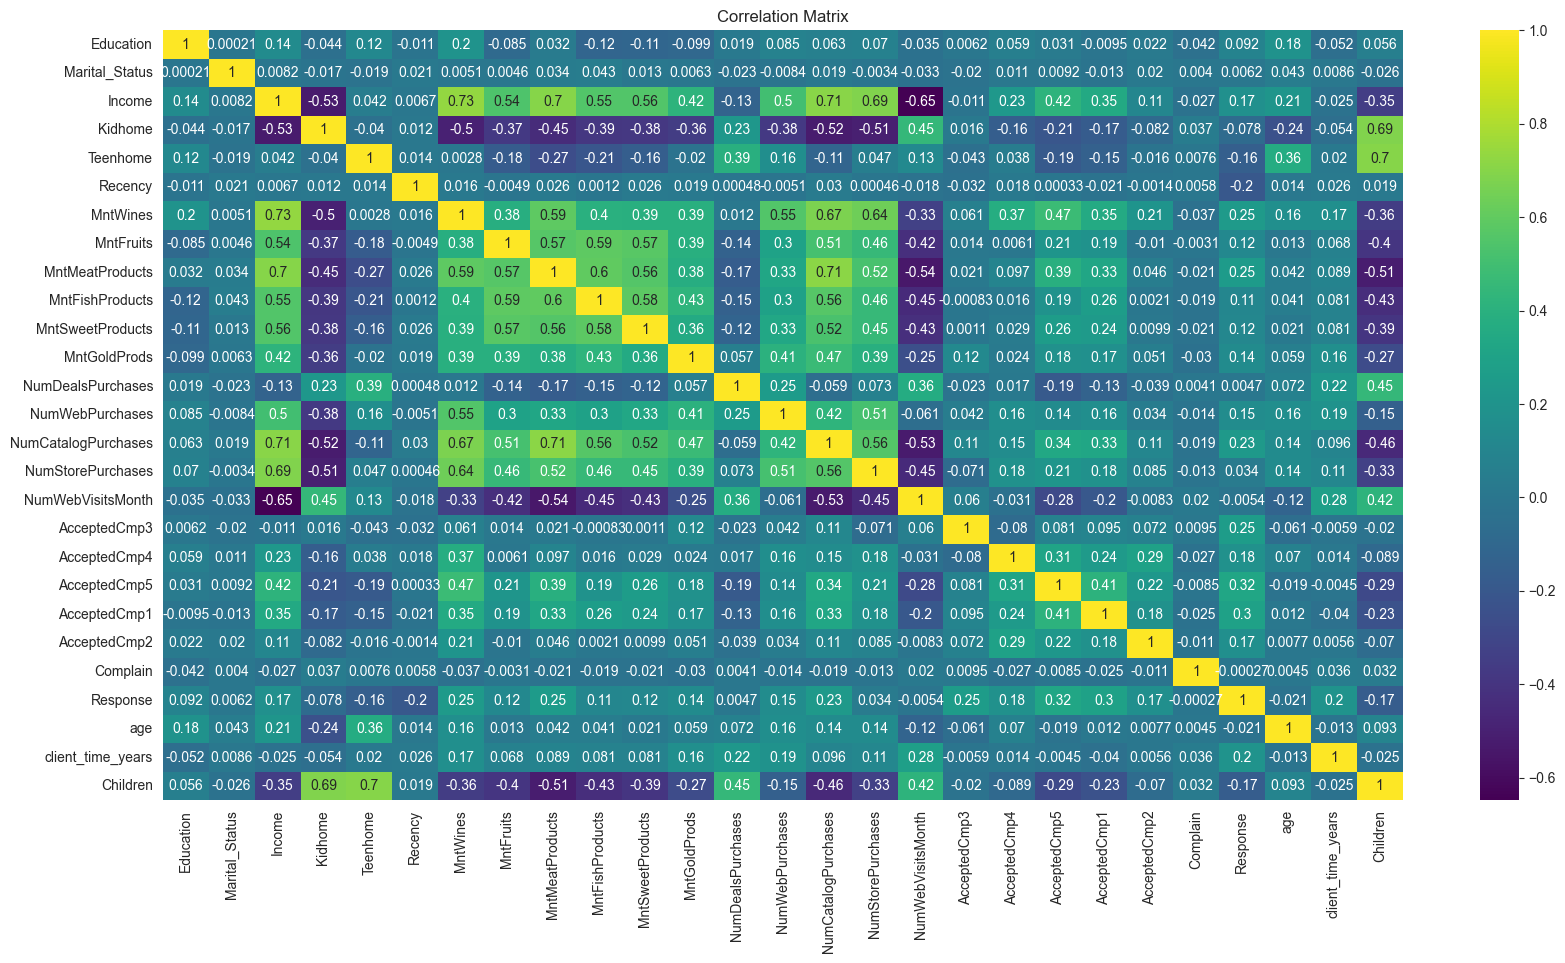

In [217]:
# select only numerical variables
numerical = data.drop(['Z_CostContact', 'Z_Revenue'], axis=1).select_dtypes(include=[np.number])
# create correlation matrix
corr = numerical.corr()
# plot the correlation matrix
fig, ax = plt.subplots(figsize=(20, 10))
sns.set_style('whitegrid')
sns.heatmap(corr, annot=True, cmap='viridis', ax=ax)
plt.title('Correlation Matrix')
plt.show()

### Task 2
Discuss whether there exists a **causal impact** of the variable ”Kidhome - number of small children in customer’s household” on the variable response. *(10 points)*

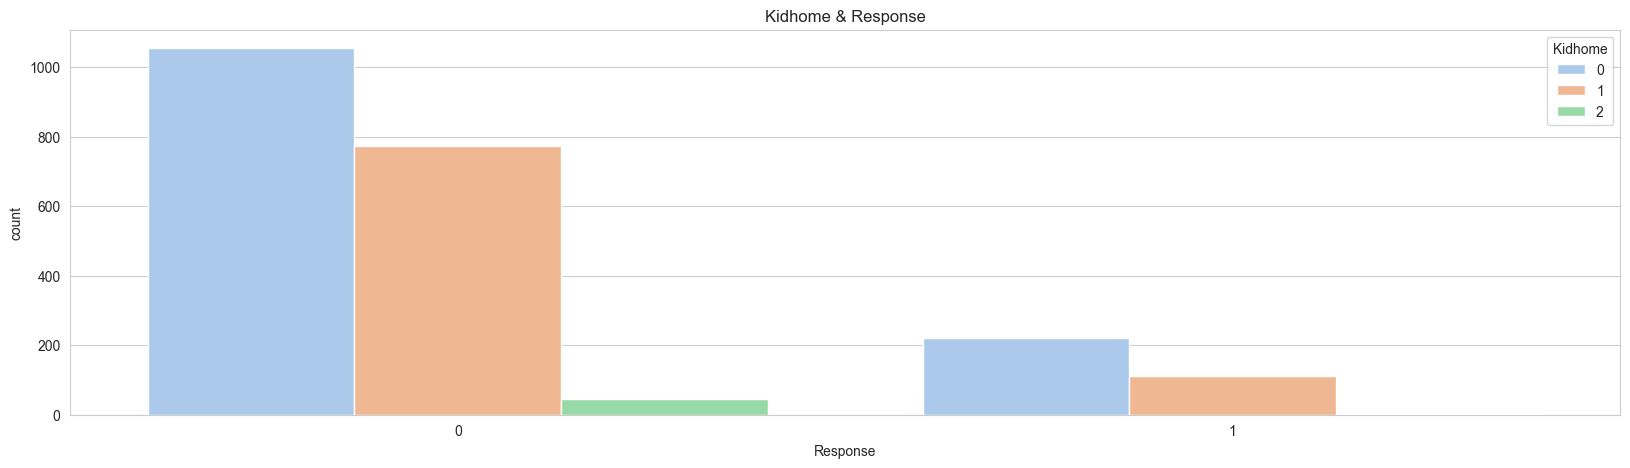

In [218]:
# plot the relation between Kidhome and Response
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='Response', data=data, hue='Kidhome', palette='pastel')
plt.title('Kidhome & Response')
plt.show()

In [219]:
# Logistic Regression
# Define the dependent variable 'response' and independent variables including 'Kidhome'
X = data['Kidhome']  # include other relevant features
y = data['Response']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Extract the p-values for interpretation
p_values = result.pvalues
print("P-values of the model:\n", p_values)

# Extract coefficients for odds ratio
coefficients = result.params
odds_ratios = pd.Series(np.exp(coefficients), index=coefficients.index)
print("Odds Ratios:\n", odds_ratios)


Optimization terminated successfully.
         Current function value: 0.421281
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2205
Model:                          Logit   Df Residuals:                     2203
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                0.007525
Time:                        08:52:05   Log-Likelihood:                -928.92
converged:                       True   LL-Null:                       -935.97
Covariance Type:            nonrobust   LLR p-value:                 0.0001746
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5536      0.073    -21.237      0.000      -1.697      -1.410
Kidhome       -0.4332      0.

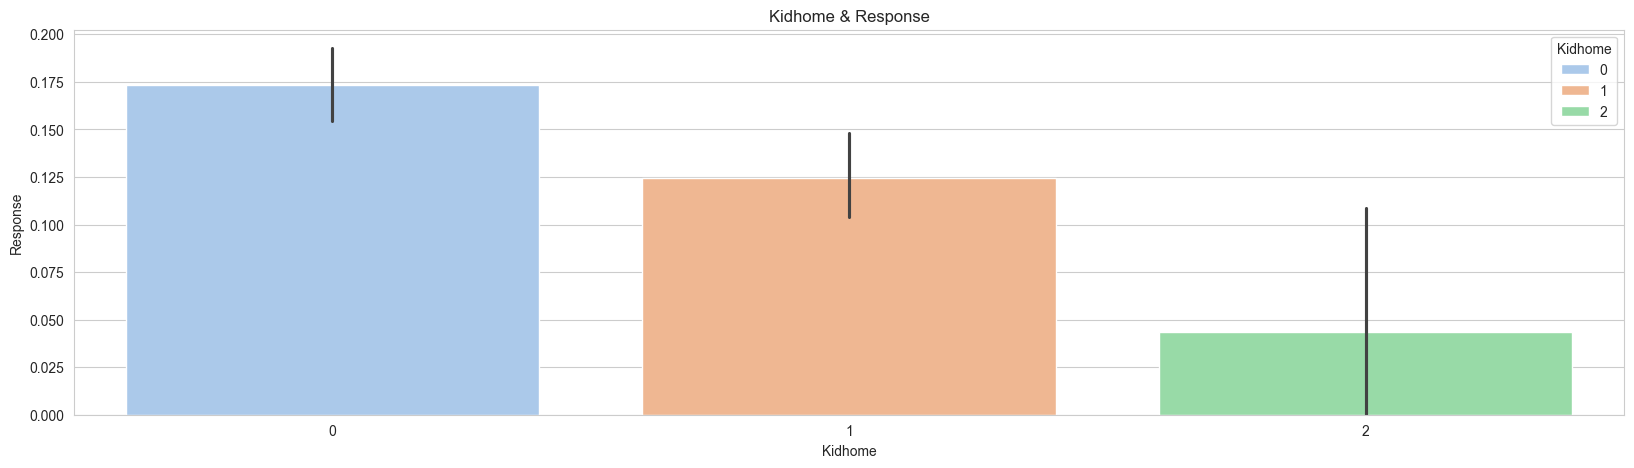

In [220]:
# propone a plot for the results above
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Kidhome', y='Response', data=data, hue='Kidhome', palette='pastel')
plt.title('Kidhome & Response')
plt.show()

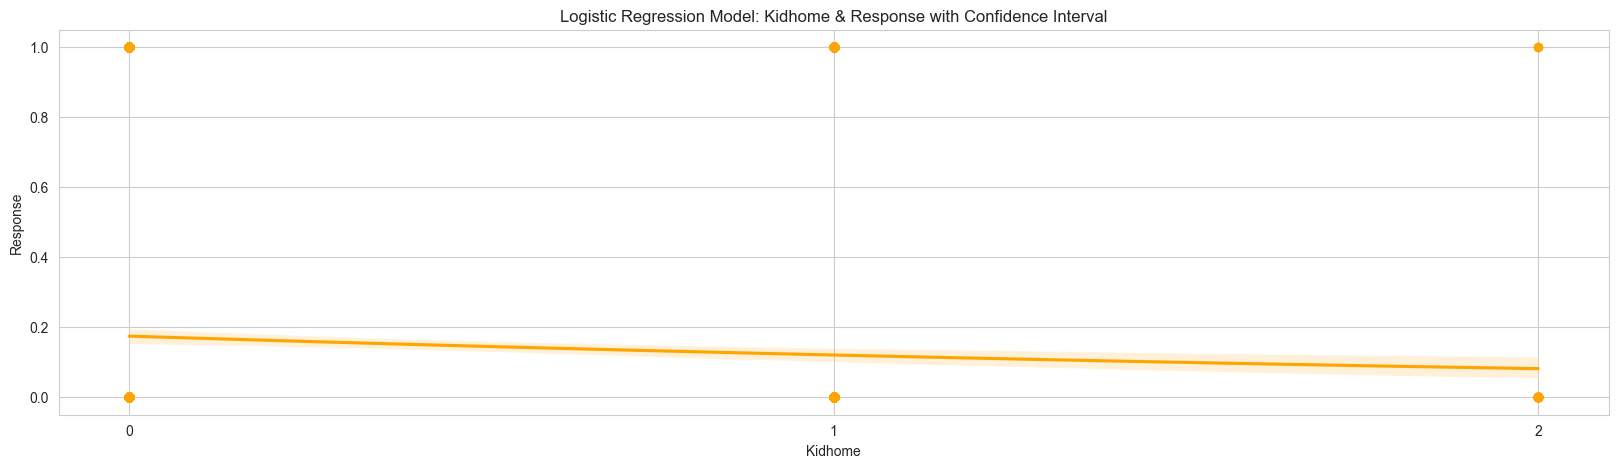

In [222]:
# plot the same model but with the confidence interval. Display integers value on both axis.
fig, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x='Kidhome', y='Response', data=data, logistic=True, ci=95, ax=ax, color='orange')
plt.title('Logistic Regression Model: Kidhome & Response with Confidence Interval')
plt.xticks(np.arange(0, 3, 1))
plt.show()

In [223]:
# Assuming the relevant columns are 'Kidhome' (treatment) and 'response' (outcome), with some covariates to control for
covariates = ['Income', 'age', 'Marital_Status'] 
data_prob = data.dropna(subset=['Kidhome', 'Response', 'Z_Revenue', 'Z_CostContact', 'Children'] + covariates)

# create new column Kidhome_binary
data_prob['Kidhome_binary'] = data_prob['Kidhome'].apply(lambda x: 1 if x > 0 else 0)

# Define treatment and outcome
treatment = 'Kidhome_binary'
outcome = 'Response'

# Define the covariates
covariates = [col for col in data_prob.columns if col not in [treatment, outcome]]

# Display the first few rows of the preprocessed dataframe
print(data_prob.head())


   Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          2               3  58138.0        0         0       58     635.0   
1          2               3  46344.0        1         1       38      11.0   
2          2               4  71613.0        0         0       26     426.0   
3          2               4  26646.0        1         0       26      11.0   
4          4               1  58293.0        1         0       94     173.0   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp1  \
0       88.0            546.0            172.0  ...             0   
1        1.0              6.0              2.0  ...             0   
2       49.0            127.0            111.0  ...             0   
3        4.0             20.0             10.0  ...             0   
4       43.0            118.0             46.0  ...             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  age  \
0             0         0            3.0

In [224]:
# Fit a logistic regression model to estimate propensity scores
propensity_model = LogisticRegression()
propensity_model.fit(data_prob, data_prob[treatment])

# Calculate propensity scores
data_prob['propensity_score'] = propensity_model.predict_proba(data_prob)[:, 1]

print(data_prob[['Kidhome_binary', 'propensity_score']].head())

   Kidhome_binary  propensity_score
0               0          0.012525
1               1          0.732911
2               0          0.129697
3               1          0.653347
4               1          0.506740


d:\Data Science\Secondo anno\Economics for data science\Big Data in Economics\BigDataInEconomics_Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
# Separate treated and control groups
treated = data_prob[data_prob[treatment] == 1]
control = data_prob[data_prob[treatment] == 0]

# Use Nearest Neighbors for matching based on propensity scores
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Create matched control group
matched_control = control.iloc[indices.flatten()]
matched_data = pd.concat([treated, matched_control])

matched_data.head()


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,client_time_years,Children,Kidhome_binary,propensity_score
1,2,3,46344.0,1,1,38,11.0,1.0,6.0,2.0,...,0,0,3.0,11.0,0,70,9.8,2,1,0.732911
3,2,4,26646.0,1,0,26,11.0,4.0,20.0,10.0,...,0,0,3.0,11.0,0,40,9.9,1,1,0.653347
4,4,1,58293.0,1,0,94,173.0,43.0,118.0,46.0,...,0,0,3.0,11.0,0,43,10.0,1,1,0.506740
7,4,1,33454.0,1,0,32,76.0,10.0,56.0,3.0,...,0,0,3.0,11.0,0,39,10.7,1,1,0.615720
8,4,4,30351.0,1,0,19,14.0,0.0,24.0,3.0,...,0,0,3.0,11.0,1,50,10.6,1,1,0.662560


In [227]:
# Calculate the average treatment effect on the treated (ATT)
treated_outcome = treated[outcome].mean()
matched_control_outcome = matched_control[outcome].mean()
treatment_effect = treated_outcome - matched_control_outcome

print(f"Average Treatment Effect on the Treated (ATT): {treatment_effect}")

Average Treatment Effect on the Treated (ATT): 0.06350914962325081


### Part 3
Propose a **market segmentation**, using Self Organizing Maps (Kohonen Maps) and explain. *(20 points)*

In [152]:
# create a column ever_accepted_campaigns that is 1 if the person ever accepted a campaign and 0 otherwise
data['ever_accepted_campaigns'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].max(axis=1)
relevant_cols = data.columns.drop(['Z_CostContact', 'Z_Revenue', 'ever_accepted_campaigns', 'Children'])
relevant_cols

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age', 'client_time_years'],
      dtype='object')

In [153]:
scaler = MinMaxScaler(feature_range=(0,1))
data_som = pd.DataFrame(scaler.fit_transform(data[relevant_cols]), columns=relevant_cols).values

Give model parameters.

In [154]:
sigma = 2
lr = 0.7
n_features = data_som.shape[1]
n_samples = data_som.shape[0]

map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))

som = MiniSom(x=map_height, y=map_width, input_len=n_features, sigma=sigma, learning_rate=lr, random_seed=123)
 
som.random_weights_init(data_som)
som.train_random(data=data_som, num_iteration=1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.616976131981392


In [155]:
# extract the winning nodes for each sample
winning_nodes = np.array([som.winner(sample) for sample in data_som])

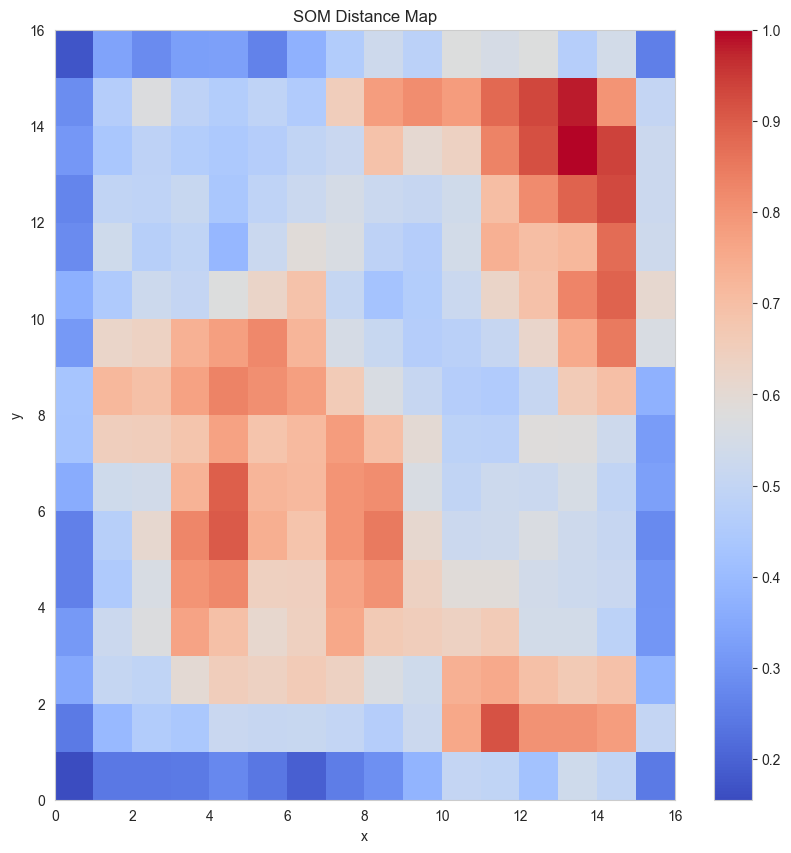

In [156]:
# plot the SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()
plt.title('SOM Distance Map')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [169]:
# find cluster with k-means
silhouette_scores = []
cluster_df = pd.DataFrame([som.winner(data_som[i]) for i in range(len(data_som))], columns=["x", "y"])
best_k = None
best_score = -1
# Iterate over each k value
for k in range(2, 10):
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k).fit(cluster_df)
    # Calculate the silhouette score
    score = silhouette_score(data_som, kmeans.labels_)
    # Check if the current k has a higher silhouette score than the previous best
    if score > best_score:
        best_k = k
        best_score = score
    silhouette_scores.append(score)
print(f"Best K: {best_k}, Best Silhouette Score: {best_score:.3f}")
kmeans = KMeans(n_clusters=best_k).fit(cluster_df)

Best K: 3, Best Silhouette Score: 0.027


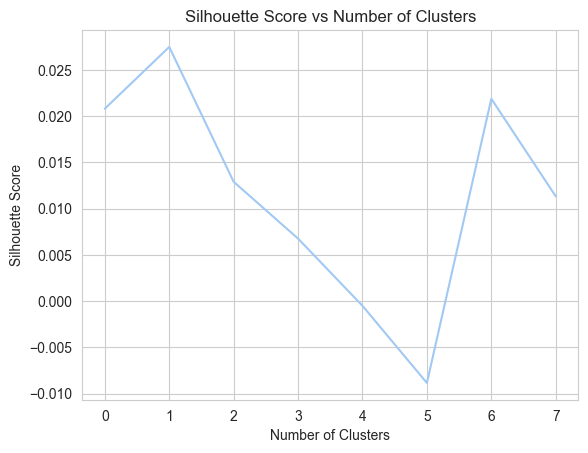

In [170]:
# plot the silhouette score
plt.plot(range(0, len(silhouette_scores)), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [171]:
cluster_df['cluster'] = kmeans.labels_
cluster_df['Response'] = data['Response']

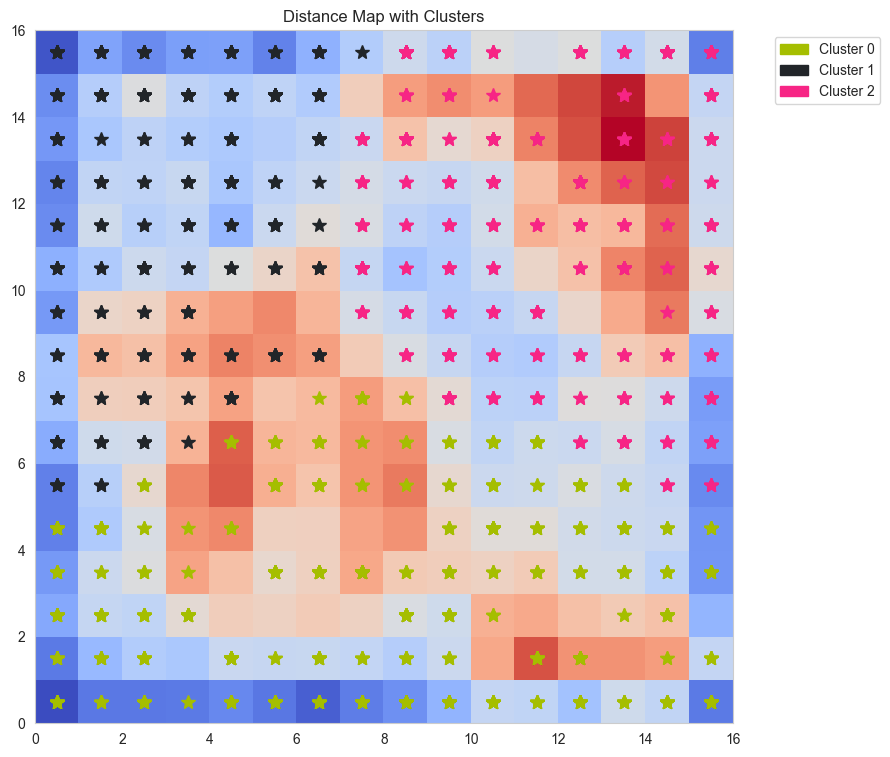

In [172]:
# Plot the Distance Map with the clusters
fig = plt.figure(figsize=(9, 9))
colors = ['#a5be00', '#212529', '#f72585']#, '#7209b7', '#fdc500', '#3c096c']
# map colors to clusters
cluster_df["color"] = cluster_df["cluster"].map(lambda x: colors[x])
plt.pcolor(som.distance_map().T, cmap="coolwarm")  
for idx, cluster in cluster_df.iterrows():
    plt.plot(cluster["x"]+0.5, cluster["y"]+0.5, marker="*", color=cluster["color"], markersize=10)
    plt.title('Distance Map with Clusters')
    plt.legend(handles=[mpatches.Patch(color=colors[i], label=f'Cluster {i}') for i in range(len(colors))], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


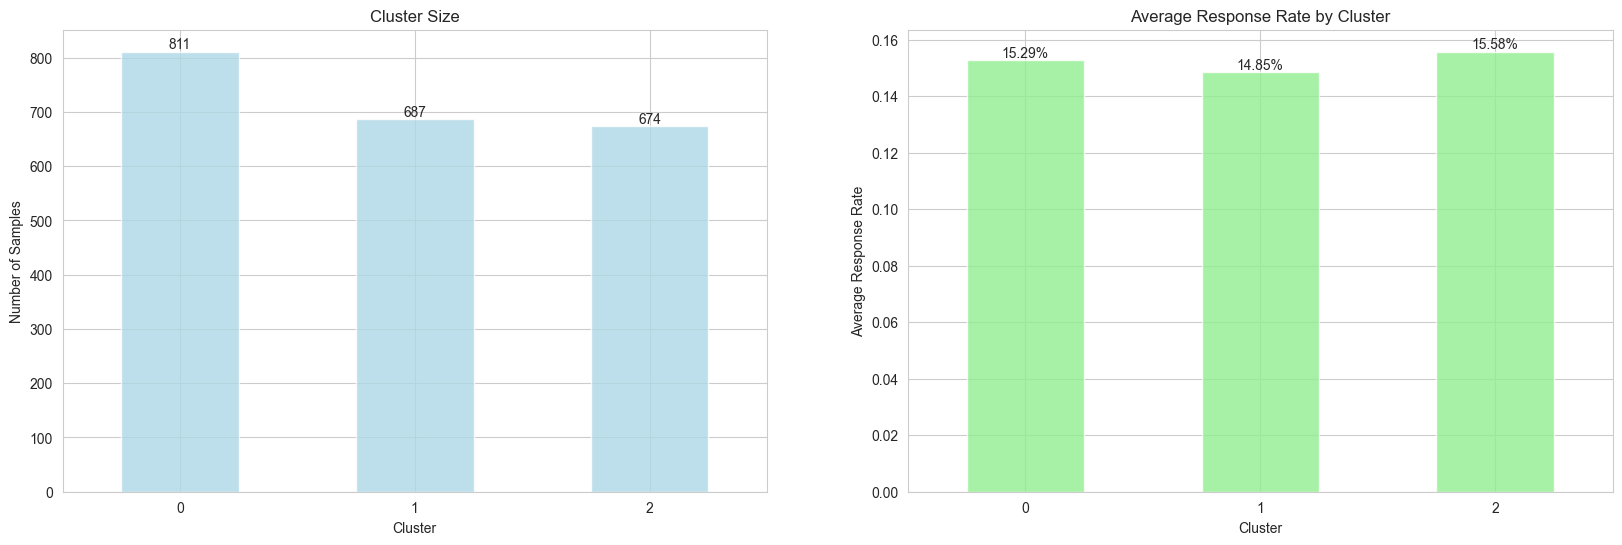

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
cluster_df.groupby('cluster')['Response'].count().plot(kind='bar', ax=ax[0], color='lightblue', alpha=0.8)
ax[0].bar_label(ax[0].containers[0], fontsize=10)
ax[0].set_title('Cluster Size')
ax[0].set_ylabel('Number of Samples')
ax[0].set_xlabel('Cluster')
ax[0].xaxis.set_tick_params(rotation=0)
cluster_df.groupby('cluster')['Response'].mean().plot(kind='bar', ax=ax[1], color='lightgreen', alpha=0.8)
ax[1].set_title('Average Response Rate by Cluster')
response_rate = cluster_df.groupby('cluster')['Response'].mean()
for i, rate in enumerate(response_rate):
    ax[1].text(i, rate, f'{rate*100:.2f}%', ha='center', va='bottom', fontsize=10)
ax[1].set_ylabel('Average Response Rate')
ax[1].set_xlabel('Cluster')
ax[1].xaxis.set_tick_params(rotation=0)
plt.show()

### Part 4
Compare two different prediction models for the variable response. Show also the **distribution of predicted probability** for both **response == 0** and **response == 1** on the test set. *(30 points)*

d:\Data Science\Secondo anno\Economics for data science\Big Data in Economics\BigDataInEconomics_Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


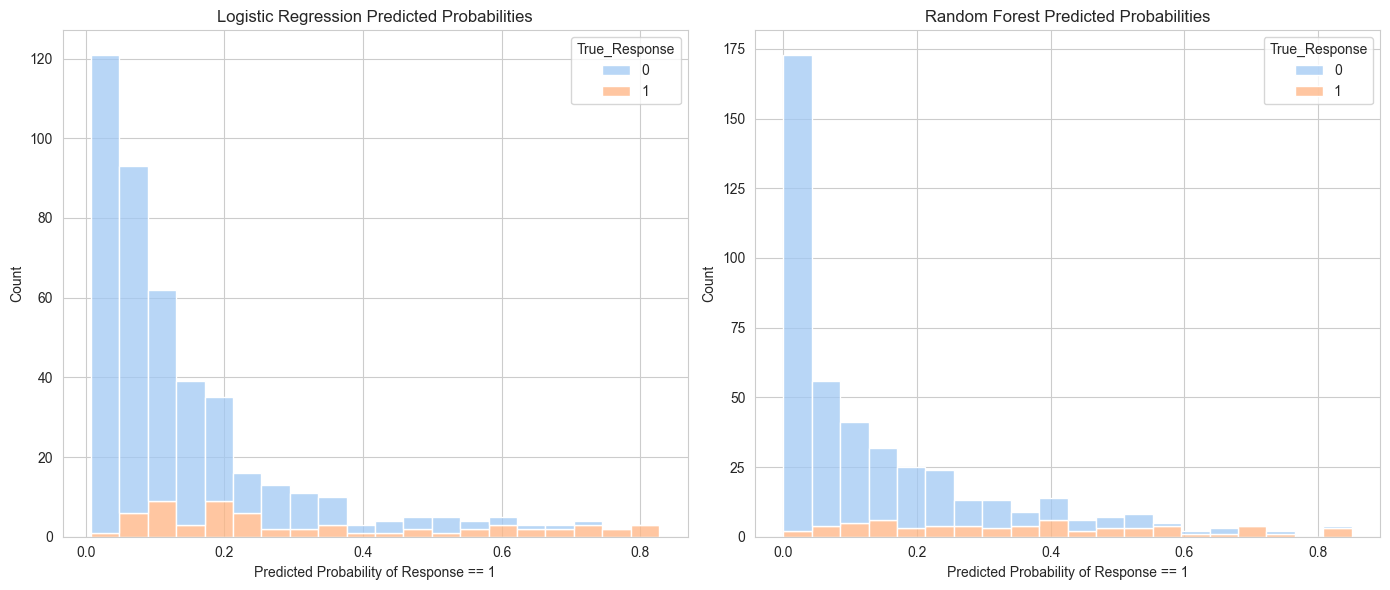

In [162]:
X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

# Step 3: Predict Probabilities
prob_lr = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for response == 1
prob_rf = rand_forest.predict_proba(X_test)[:, 1]

# for plotting
prob_df = pd.DataFrame({'Probability_LR': prob_lr, 'Probability_RF': prob_rf, 'True_Response': y_test})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data=prob_df, x='Probability_LR', hue='True_Response', multiple='stack', ax=axes[0], bins=20)
sns.histplot(data=prob_df, x='Probability_RF', hue='True_Response', multiple='stack', ax=axes[1], bins=20)

axes[0].set_title('Logistic Regression Predicted Probabilities')
axes[1].set_title('Random Forest Predicted Probabilities')
axes[0].set_xlabel('Predicted Probability of Response == 1')
axes[1].set_xlabel('Predicted Probability of Response == 1')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

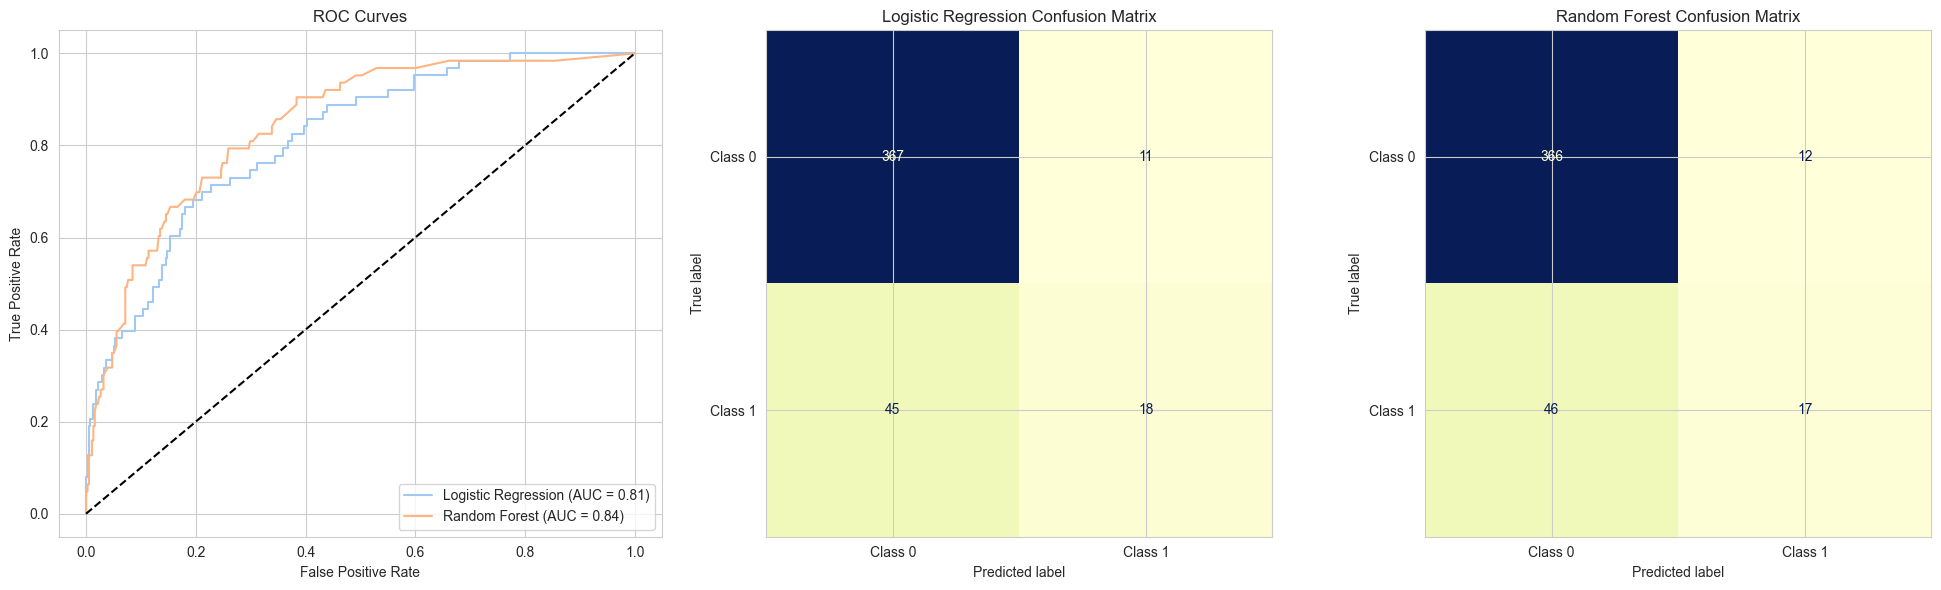

In [163]:
# ROC Curve and AUC for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# generate confusion matrices --> predict classes instead of probabilities
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rand_forest.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
# ROC Curves
ax[0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
ax[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curves')
ax[0].legend(loc='lower right')
# Confusion Matrices
ConfusionMatrixDisplay(cm_lr, display_labels=['Class 0', 'Class 1']).plot(ax=ax[1], colorbar=False,  cmap='YlGnBu')
ax[1].set_title('Logistic Regression Confusion Matrix')
plt.tight_layout()
ConfusionMatrixDisplay(cm_rf, display_labels=['Class 0', 'Class 1']).plot(ax=ax[2], colorbar=False, cmap='YlGnBu')
ax[2].set_title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

In [164]:
table = [["Model", "Accuracy", "F1 Score", "Precision", "Recall"], ["Logistic reg", round(accuracy_score(y_test, log_reg.predict(X_test)),3), round(f1_score(y_test, log_reg.predict(X_test)),3), round(precision_score(y_test, log_reg.predict(X_test)),3), round(recall_score(y_test, log_reg.predict(X_test)),3)],
         ["Random Forest", round(accuracy_score(y_test, rand_forest.predict(X_test)),3), round(f1_score(y_test, rand_forest.predict(X_test)),3), round(precision_score(y_test, rand_forest.predict(X_test)),3), round(recall_score(y_test, rand_forest.predict(X_test)),3)]]
print(tabulate(table, headers='firstrow', tablefmt='rounded_outline'))

╭───────────────┬────────────┬────────────┬─────────────┬──────────╮
│ Model         │   Accuracy │   F1 Score │   Precision │   Recall │
├───────────────┼────────────┼────────────┼─────────────┼──────────┤
│ Logistic reg  │      0.873 │      0.391 │       0.621 │    0.286 │
│ Random Forest │      0.868 │      0.37  │       0.586 │    0.27  │
╰───────────────┴────────────┴────────────┴─────────────┴──────────╯


In [165]:
# feature importance of the two models
importance_lr = pd.DataFrame(log_reg.coef_, columns=X.columns)
importance_rf = pd.DataFrame(rand_forest.feature_importances_, index=X.columns, columns=['Importance'])
importance_lr = importance_lr.T

importance_lr.columns = ['Importance']
importance_rf.columns = ['Importance']

importance_lr = importance_lr.sort_values(by='Importance', ascending=False)
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

print(tabulate(importance_lr.head().round(2), headers='keys', tablefmt='rounded_outline'))
print(tabulate(importance_rf.head().round(2), headers='keys', tablefmt='rounded_outline'))

╭─────────────────────────┬──────────────╮
│                         │   Importance │
├─────────────────────────┼──────────────┤
│ ever_accepted_campaigns │         0.17 │
│ NumWebVisitsMonth       │         0.13 │
│ NumCatalogPurchases     │         0.13 │
│ NumWebPurchases         │         0.1  │
│ AcceptedCmp3            │         0.09 │
╰─────────────────────────┴──────────────╯
╭─────────────────────────┬──────────────╮
│                         │   Importance │
├─────────────────────────┼──────────────┤
│ Recency                 │         0.09 │
│ Income                  │         0.07 │
│ MntWines                │         0.07 │
│ client_time_years       │         0.07 │
│ ever_accepted_campaigns │         0.06 │
╰─────────────────────────┴──────────────╯


### Part 5
Compare the two models with the use of the profit curve and answer the following question: **what is the best percentage of customers to be contacted to maximize profits?** *(30 points)*

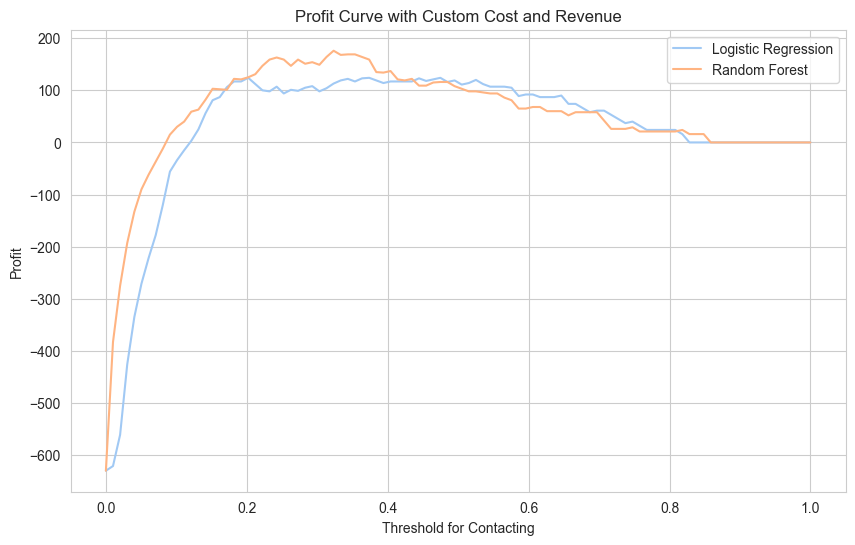

Optimal threshold for Logistic Regression: 0.20%
Optimal threshold for Random Forest: 0.32%
Percentage of customers to contact (LR): 22.22%
Percentage of customers to contact (RF): 14.97%


In [166]:
Z_CostContact = data['Z_CostContact'][0]  # get cost
Z_Revenue = data['Z_Revenue'][0]  # get revenure

def calculate_profit(y_true, y_prob, threshold, cost, benefit):
    # Predict responses based on the threshold
    y_pred = y_prob >= threshold
    # Calculate true positives and false positives
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    # Calculate profit
    profit = (tp * benefit) - (tp + fp) * cost
    return profit

thresholds = np.linspace(0, 1, 100)

# Recalculate profits for a range of thresholds using the custom cost and revenue
profits_lr = [calculate_profit(y_test, prob_lr, threshold, Z_CostContact, Z_Revenue) for threshold in thresholds]
profits_rf = [calculate_profit(y_test, prob_rf, threshold, Z_CostContact, Z_Revenue) for threshold in thresholds]

# Plot the new profit curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, profits_lr, label='Logistic Regression')
plt.plot(thresholds, profits_rf, label='Random Forest')
plt.xlabel('Threshold for Contacting')
plt.ylabel('Profit')
plt.title('Profit Curve with Custom Cost and Revenue')
plt.legend()
plt.show()

# Determine optimal contact percentage with the new figures
optimal_threshold_lr = thresholds[np.argmax(profits_lr)]
optimal_threshold_rf = thresholds[np.argmax(profits_rf)]
print(f"Optimal threshold for Logistic Regression: {optimal_threshold_lr:.2f}%")
print(f"Optimal threshold for Random Forest: {optimal_threshold_rf:.2f}%")

# Calculate the percentage of customers to be contacted at the optimal threshold
percentage_lr = np.mean(prob_lr >= optimal_threshold_lr) * 100
percentage_rf = np.mean(prob_rf >= optimal_threshold_rf) * 100
print(f"Percentage of customers to contact (LR): {percentage_lr:.2f}%")
print(f"Percentage of customers to contact (RF): {percentage_rf:.2f}%")